In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import yfinance as yf
import datetime
%matplotlib inline

## Data Loading, Summarization & Early Vizualizations

### FED Funds Data

In [2]:
fedfunds = pd.read_csv("FEDFUNDS.csv") # Initial Readin
fedfunds['DATE'] = pd.to_datetime(fedfunds['DATE'],infer_datetime_format=True)# Converting Date column to pandas datetime
fedfunds.head() # Summary of first six lines of the data

DATE  FEDFUNDS
0 1954-07-01      0.80
1 1954-08-01      1.22
2 1954-09-01      1.07
3 1954-10-01      0.85
4 1954-11-01      0.83

In [3]:
fedfunds.describe() # Quick Summary of the Data
print(fedfunds.dtypes) # Checking data Objects

DATE        datetime64[ns]
FEDFUNDS           float64
dtype: object


In [4]:
print(' There are',len(fedfunds),'rows of data.\n',
     'They dates range from',fedfunds['DATE'][0].date(),'to',fedfunds['DATE'][len(fedfunds)-1].date(),'monthly.')

 There are 824 rows of data.
 They dates range from 1954-07-01 to 2023-02-01 monthly.


In [5]:
#Getting column for just years
fedfunds['year'] = fedfunds['DATE'].dt.year # Adding new column to just show year for plotting long term purposes
fedfunds.head() # Display

DATE  FEDFUNDS  year
0 1954-07-01      0.80  1954
1 1954-08-01      1.22  1954
2 1954-09-01      1.07  1954
3 1954-10-01      0.85  1954
4 1954-11-01      0.83  1954

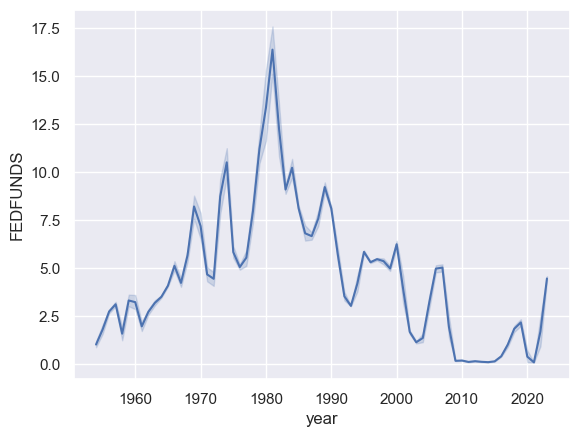

In [6]:
sns.set_theme(style='dark') # Theme
sns.lineplot(x=fedfunds['year'],y=fedfunds['FEDFUNDS']) # Plotting object
plt.grid()

### Investment Banking Market Data

In [8]:
# Reading in all of the bank data
jp = pd.read_csv("JPC_historical.csv")
c = pd.read_csv("C_historical.csv")
wfc = pd.read_csv("wfc_historical.csv")
bac = pd.read_csv("BAC_historical.csv")
usb = pd.read_csv("USB_historical.csv")

In [12]:
# Banks
c['Date'] = pd.to_datetime(c['Date'])
wfc['Date'] = pd.to_datetime(wfc['Date'])
bac['Date'] = pd.to_datetime(bac['Date'])
usb['Date'] = pd.to_datetime(usb['Date'])
jp['Date'] = pd.to_datetime(jp['Date'])
 # Checking the Data Types
jp.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [13]:
# JPMorgan
jp[jp.columns[1]] = jp[jp.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
jp[jp.columns[3:]] = jp[jp.columns[3:]].replace('[\$,]', '', regex=True).astype(float) # Remaining Columns Conversion
# Wells Fargo
wfc[wfc.columns[1]] = wfc[wfc.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
wfc[wfc.columns[3:]] = wfc[wfc.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
# Citi Bank
c[c.columns[1]] = c[c.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
c[c.columns[3:]] = c[c.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
# Bank of America
bac[bac.columns[1]] = bac[bac.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
bac[bac.columns[3:]] = bac[bac.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
# U.S. Bancorp
usb[usb.columns[1]] = usb[usb.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
usb[usb.columns[3:]] = usb[usb.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [14]:
jp.dtypes # Rechecking the columns

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

#### JP MORGAN CHASE

In [10]:
round(jp.describe(),2)

Close/Last       Volume    Open    High     Low
count      250.00       250.00  250.00  250.00  250.00
mean       125.94  12332838.00  125.87  127.26  124.46
std         10.82   4388299.12   10.71   10.65   10.81
min        101.96   3220496.00  101.80  104.54  101.28
25%        115.82   9311279.00  116.00  117.30  114.66
50%        127.15  11511325.00  126.68  128.29  125.75
75%        135.07  14263320.00  134.77  135.72  133.50
max        143.80  33420140.00  143.35  144.34  142.28

#### BANK OF AMERICA

In [16]:
round(bac.describe(),2)

Close/Last        Volume    Open    High     Low
count      250.00  2.500000e+02  250.00  250.00  250.00
mean        35.21  4.314670e+07   35.23   35.66   34.78
std          2.99  1.424952e+07    3.05    3.04    2.99
min         29.77  1.611850e+07   29.41   30.22   29.31
25%         33.16  3.304278e+07   33.28   33.67   32.86
50%         34.76  4.048539e+07   34.75   35.21   34.28
75%         36.66  4.934548e+07   36.74   37.11   36.17
max         44.18  1.097790e+08   44.25   44.63   43.70

#### WELLS FARGO

In [17]:
round(wfc.describe(),2)

Close/Last       Volume    Open    High     Low
count      250.00       250.00  250.00  250.00  250.00
mean        44.52  20508085.84   44.51   45.09   43.92
std          3.10   8698689.21    3.15    3.12    3.12
min         37.43   4913253.00   37.36   37.73   36.54
25%         42.52  14868847.50   42.54   43.06   42.10
50%         44.32  18614255.00   44.34   44.90   43.59
75%         46.73  24085150.00   46.67   47.08   46.14
max         53.39  65583240.00   53.06   54.20   52.30

#### CITIGROUP

In [18]:
round(c.describe(),2)

Close/Last       Volume    Open    High     Low
count      250.00       250.00  250.00  250.00  250.00
mean        49.21  20328642.74   49.20   49.83   48.57
std          3.62   7924687.74    3.64    3.64    3.62
min         40.45   6823564.00   40.20   41.36   40.01
25%         46.34  15256560.00   46.52   47.02   45.60
50%         49.68  19092890.00   49.72   50.26   48.86
75%         51.80  23640307.50   51.53   52.25   51.09
max         57.50  86566230.00   57.83   58.25   57.31

#### U.S. BANCORP

In [19]:
round(usb.describe(),2)

Close/Last       Volume    Open    High     Low
count      250.00       250.00  250.00  250.00  250.00
mean        47.23   8171047.56   47.26   47.77   46.69
std          3.91   3248609.43    3.97    3.97    3.90
min         38.79   2564603.00   38.59   39.48   38.39
25%         44.19   5946521.00   44.24   44.70   43.76
50%         47.11   7560470.50   47.14   47.69   46.65
75%         49.24   9457515.25   49.26   49.78   48.65
max         57.12  21456460.00   57.70   57.92   56.76

There are 250 rows of data representing the days in past year that the market was open.

<Figure size 640x480 with 0 Axes>

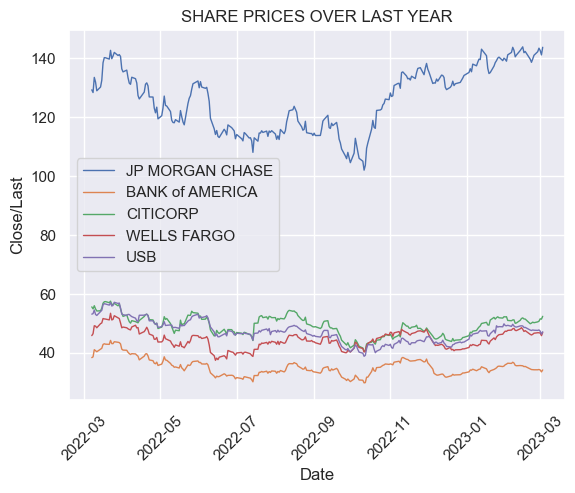

<Figure size 640x480 with 0 Axes>

In [37]:
sns.set_theme(style='dark')
#JP MORGAN
sns.lineplot(x ='Date',y = 'Close/Last',data=jp,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=bac,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=c,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=wfc,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=usb,lw=1)
plt.title('SHARE PRICES OVER LAST YEAR')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['JP MORGAN CHASE','BANK of AMERICA','CITICORP','WELLS FARGO','USB'])
plt.figure()

## Data Preprocessing

In [38]:
# Getting Last Twelve Months from the FEDFUNDS dataset
ff1y = pd.DataFrame(fedfunds[-12:]).reset_index()
ff1y['month'] = ff1y['DATE'].dt.strftime("%Y-%m")
# Adding new column representing months to add the FFR to the JP dataset
jp['month'] = jp['Date'].dt.strftime("%Y-%m")
bac['month'] = bac['Date'].dt.strftime("%Y-%m")
wfc['month'] = wfc['Date'].dt.strftime("%Y-%m")
c['month'] = c['Date'].dt.strftime("%Y-%m")
usb['month'] = usb['Date'].dt.strftime("%Y-%m")

In [39]:
jp.head() # New column "month" is added

Date  Close/Last    Volume    Open      High       Low    month
0 2023-03-03      143.66   9513063  141.51  143.7400  141.0800  2023-03
1 2023-03-02      141.07  11107550  142.24  142.4300  139.5400  2023-03
2 2023-03-01      142.55   7139155  142.10  143.4583  141.8000  2023-03
3 2023-02-28      143.35  11019760  142.94  143.7600  141.9001  2023-02
4 2023-02-27      142.16  10014650  142.11  143.3100  141.7201  2023-02

In [40]:
ff1y = ff1y.drop('index',axis=1) # dropping original index
ff1y.head() # Displaying new index

DATE  FEDFUNDS  year    month
0 2022-03-01      0.20  2022  2022-03
1 2022-04-01      0.33  2022  2022-04
2 2022-05-01      0.77  2022  2022-05
3 2022-06-01      1.21  2022  2022-06
4 2022-07-01      1.68  2022  2022-07

In [41]:
# Now there is a indexing key to map the FFRs from the past year without manual entry
jp['month'][len(jp)-1] == ff1y['month'][0] 

True

In [44]:
def dict_map_maker(map_df):
    demo = map_df.iloc[:,[1,3]]
    ffr_dict = {}
    for i in range(len(demo)):
        ffr_dict[demo['month'][i]] = demo['FEDFUNDS'][i]
    #print(ffr_dict)
    return ffr_dict

def mapping_ffr(df,map_df):
    map_df_dict = dict_map_maker(map_df)
    df['FFR'] = df['month'].map(map_df_dict)
    return df,map_df_dict

In [45]:
jp_analysis, ffr_dict = mapping_ffr(jp,ff1y)
bac_analysis, _ = mapping_ffr(bac,ff1y)
wfc_analysis, _  = mapping_ffr(wfc,ff1y)
c_analysis, _ = mapping_ffr(c,ff1y)
usb_analysis, _ = mapping_ffr(usb,ff1y)

In [48]:
last_rate = ffr_dict[list(ffr_dict.keys())[len(ffr_dict)-1]]
print(last_rate)

# Filling in the Na value incase rate for new month hasn't come out yet
jp_analysis['FFR'] = jp_analysis['FFR'].fillna(last_rate)
bac_analysis['FFR'] = bac_analysis['FFR'].fillna(last_rate)
wfc_analysis['FFR'] = wfc_analysis['FFR'].fillna(last_rate)
c_analysis['FFR'] = c_analysis['FFR'].fillna(last_rate)
usb_analysis['FFR'] = usb_analysis['FFR'].fillna(last_rate)
# Filling in the Na value incase rate for new month hasn't come out yet
jp_analysis

4.57


Date  Close/Last    Volume     Open      High       Low    month  \
0   2023-03-03      143.66   9513063  141.510  143.7400  141.0800  2023-03   
1   2023-03-02      141.07  11107550  142.240  142.4300  139.5400  2023-03   
2   2023-03-01      142.55   7139155  142.100  143.4583  141.8000  2023-03   
3   2023-02-28      143.35  11019760  142.940  143.7600  141.9001  2023-02   
4   2023-02-27      142.16  10014650  142.110  143.3100  141.7201  2023-02   
..         ...         ...       ...      ...       ...       ...      ...   
245 2022-03-11      128.89  20061790  132.485  134.0800  128.4249  2022-03   
246 2022-03-10      131.86  15604250  131.860  133.4500  130.3250  2022-03   
247 2022-03-09      133.44  17536200  132.900  135.2400  132.4400  2022-03   
248 2022-03-08      128.30  19207820  129.640  131.7900  127.2700  2022-03   
249 2022-03-07      129.21  27560050  132.170  132.6900  128.9513  2022-03   

      FFR  
0    4.57  
1    4.57  
2    4.57  
3    4.57  
4    4.57  
..    ...  
245  0.20  
246  0.20  
247  0.20  
248  0.20  
249  0.20  

[250 rows x 8 columns]

### Classifying Fed Fund Rates

In [53]:
jp_analysis['FFR'].describe()

count    250.000000
mean       2.440920
std        1.502711
min        0.200000
25%        1.210000
50%        2.560000
75%        4.020000
max        4.570000
Name: FFR, dtype: float64

Within the past year the highest FFR was 4.54(Current). The lowest FFR was 0.2. The average FFR was 2.44920. For just one year we'll classify a higher rate as anything above the average FFR. There are two goals of this project. 
<ul>
    <li>Predict the next FFR based on JPMorgan share trends.</li>
    <li>Analyze how the JPMorgan Share data is effected by the FFR</li>

### Early Analysis